In [1]:
# Load the necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the CSV file into a pandas dataframe
dataset = pd.read_csv("weather.csv")

# Apply one-hot encoding to the categorical variables
dataset = pd.get_dummies(dataset, columns=['Play','Humidity', 'Wind', 'Outlook', 'Temperature'])



# Separate the target variable from the features
X = dataset.drop(['Play_No','Play_Yes'], axis=1)
y = dataset['Play_Yes']


X.head()
# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Train the classifier on the training data
dt.fit(X, y)


cname = set(dataset['Play_Yes'].unique())
cname=list(cname)
cname = [str(elem) for elem in cname]

# Visualize the decision tree



In [2]:
data = pd.read_csv("test_weather.csv")
new_data=data
new_data = pd.get_dummies(new_data, columns=['Humidity', 'Wind', 'Outlook', 'Temperature'])


predict=pd.DataFrame(columns=X.columns)

for i in range(len(new_data)):
    for col in X.columns.values:
        if col in new_data.columns:
            predict.loc[i, col] = new_data.loc[i, col]
        else:
            predict.loc[i, col] = False


y_pred=dt.predict(predict)
y_pred=pd.DataFrame(y_pred)
out=pd.concat([data,y_pred] , axis=1 )
out.head()

,Outlook,Temperature,Humidity,Wind,0
0,Sunny,Hot,Normal,Weak,True
1,Overcast,Mild,High,Strong,True


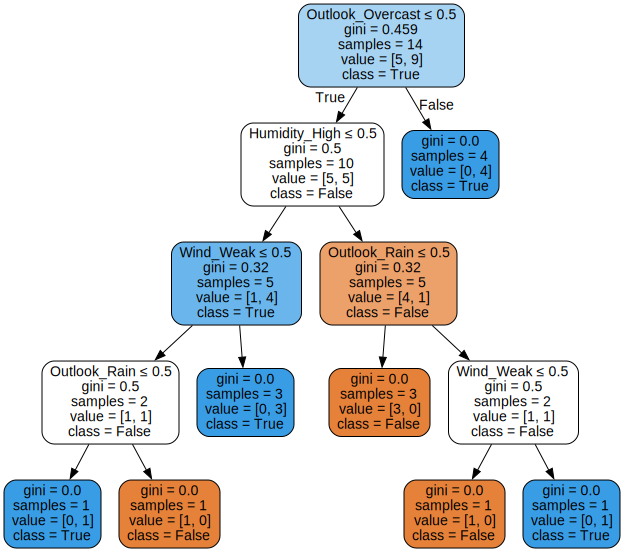

In [3]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns.values,  class_names=cname,  filled=True, rounded=True,  special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("weather_decision_tree")

# Show the decision tree
graph

In [4]:
# Load the necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz


dataset = pd.read_csv("suv_data.csv")
dataset = pd.get_dummies(dataset, columns=['Purchased','Gender'])
dataset.drop(['Gender_Female','User ID','Purchased_0'] , axis=1 , inplace=True)
#independent variable

dataset.head()
X = dataset.drop(['Purchased_1'], axis=1)
y = dataset['Purchased_1']
# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Train the classifier on the training data
dt.fit(X, y)

cname = set(dataset['Purchased_1'].unique())
cname=list(cname)
cname = [str(elem) for elem in cname]





In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased_1,Gender_Male
0,19,19000,False,True
1,35,20000,False,True
2,26,43000,False,False
3,27,57000,False,False
4,19,76000,False,True


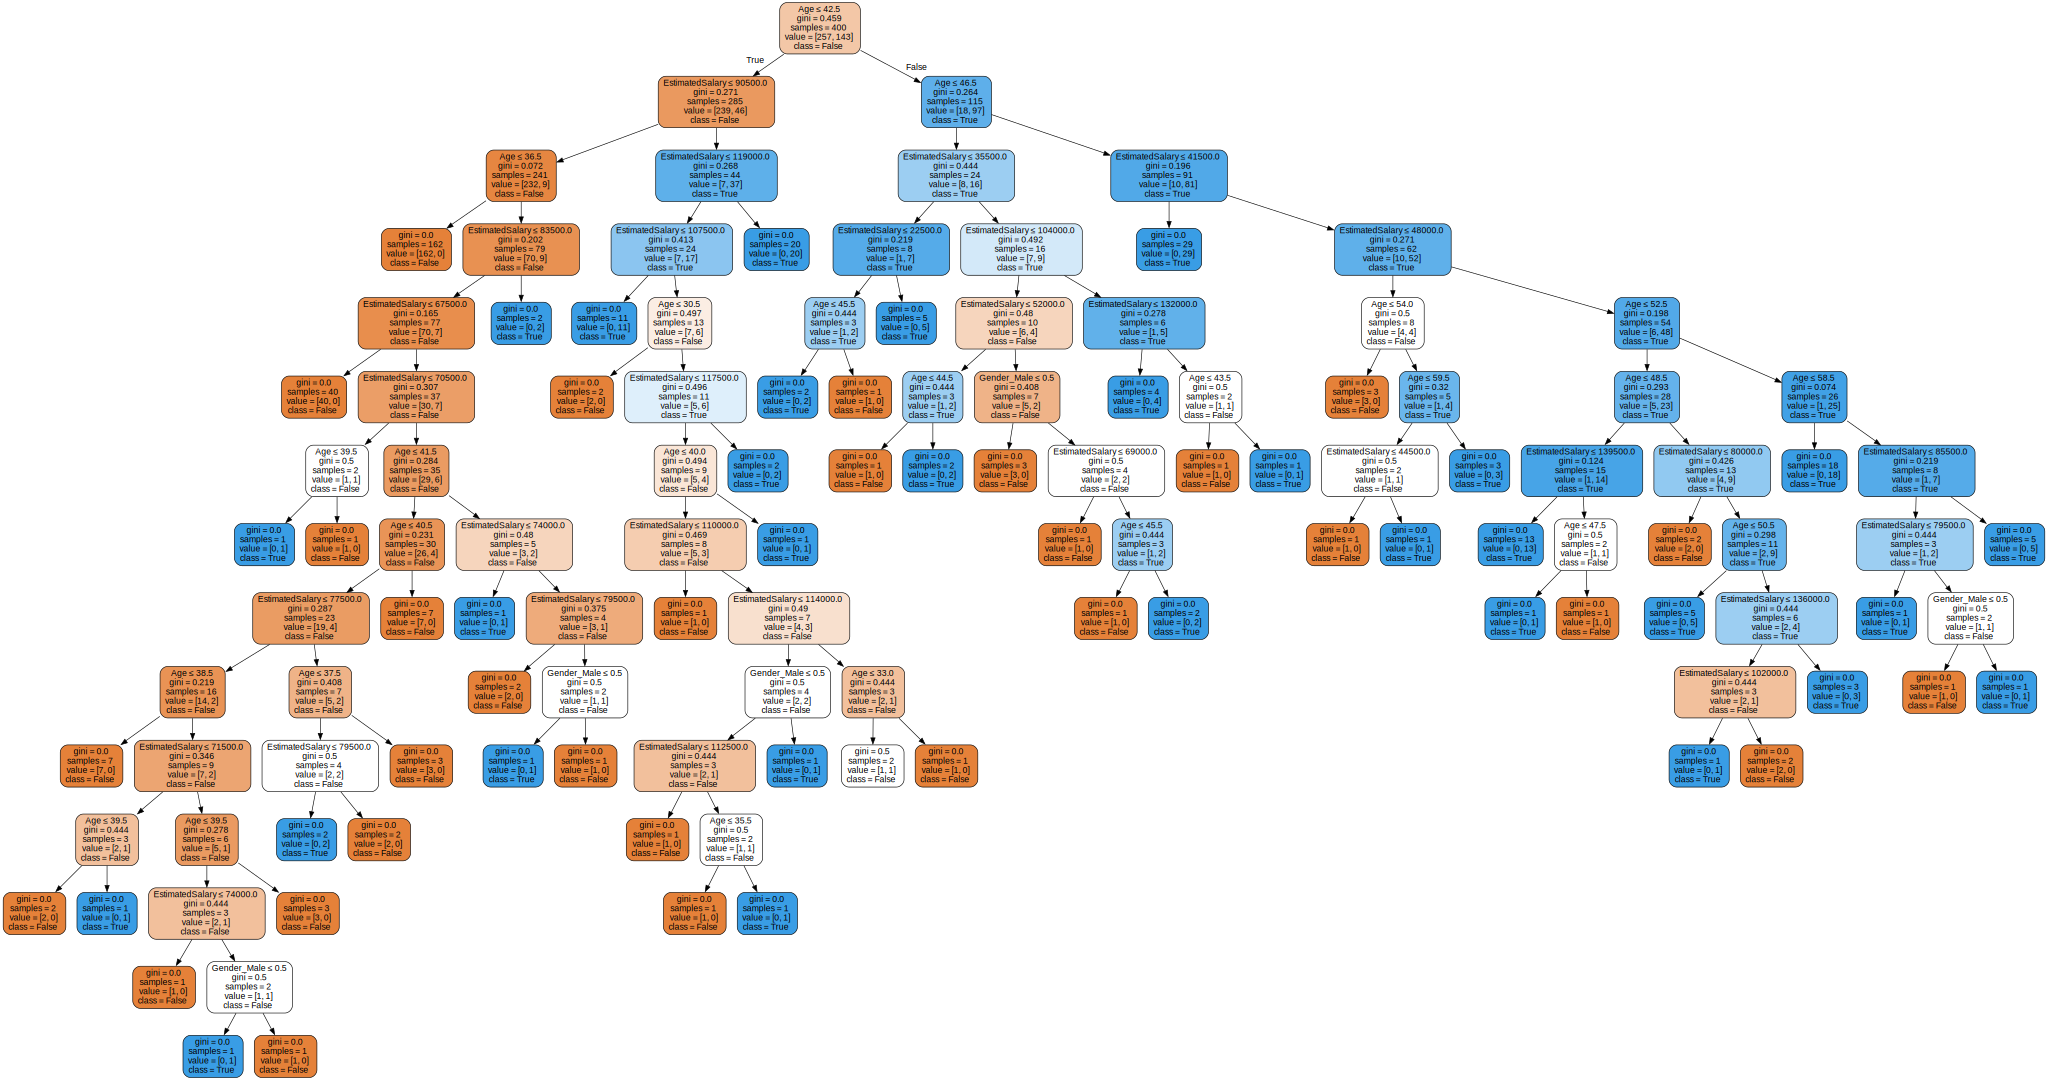

In [6]:
# Visualize the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.values,  
                           class_names=cname,  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("suv_data_tree")

# Show the decision tree
graph